# Data Preparation - for features 17 - 24

In [1]:
# import library used for data management
import numpy as np 
import pandas as pd 

In [2]:
# load datasets
original = pd.read_csv('Sharon_hotel_bookings.csv')
label = pd.read_csv('label_hotel_bookings.csv')

In [3]:
# to view the whole data set
original

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent
0,0,0,0,C,C,3,No Deposit,NaN
1,0,0,0,C,C,4,No Deposit,NaN
2,0,0,0,A,C,0,No Deposit,NaN
3,0,0,0,A,A,0,No Deposit,304.0
4,0,0,0,A,A,0,No Deposit,240.0
...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,No Deposit,394.0
119386,0,0,0,E,E,0,No Deposit,9.0
119387,0,0,0,D,D,0,No Deposit,9.0
119388,0,0,0,A,A,0,No Deposit,89.0


In [4]:
original.info()
# 'is_repeated_guest' should be categorical instead of numeric
# 16,340 missing values found in 'agent'
# 'agent' should be categorical instead of numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
reserved_room_type                119390 non-null object
assigned_room_type                119390 non-null object
booking_changes                   119390 non-null int64
deposit_type                      119390 non-null object
agent                             103050 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 7.3+ MB


In [5]:
# change 'is_repeated_guest' to categorical
original['is_repeated_guest']=original['is_repeated_guest'].astype(str)
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
is_repeated_guest                 119390 non-null object
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
reserved_room_type                119390 non-null object
assigned_room_type                119390 non-null object
booking_changes                   119390 non-null int64
deposit_type                      119390 non-null object
agent                             103050 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 7.3+ MB


In [6]:
# handle missing values in 'agent'
# NaN in 'agent' means the booking is not made by a travel agency
# replace NaN with 0 for the ease of data handling
original['agent'].fillna(0,inplace=True)
original['agent']

0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [7]:
# change 'agent' to categorical
original['agent']=original['agent'].astype(str)
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
is_repeated_guest                 119390 non-null object
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
reserved_room_type                119390 non-null object
assigned_room_type                119390 non-null object
booking_changes                   119390 non-null int64
deposit_type                      119390 non-null object
agent                             119390 non-null object
dtypes: int64(3), object(5)
memory usage: 7.3+ MB


In [8]:
original

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent
0,0,0,0,C,C,3,No Deposit,0.0
1,0,0,0,C,C,4,No Deposit,0.0
2,0,0,0,A,C,0,No Deposit,0.0
3,0,0,0,A,A,0,No Deposit,304.0
4,0,0,0,A,A,0,No Deposit,240.0
...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,No Deposit,394.0
119386,0,0,0,E,E,0,No Deposit,9.0
119387,0,0,0,D,D,0,No Deposit,9.0
119388,0,0,0,A,A,0,No Deposit,89.0


In [9]:
# get dummy variables for categorical variable 'deposit_type'
DepositTypeDummy =pd.get_dummies(original['deposit_type'],prefix='deposit_type')

In [10]:
# Adding the dummy variables to the data frame
original = pd.concat([original,DepositTypeDummy],axis=1,sort=True)
original

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,C,C,3,No Deposit,0.0,1,0,0
1,0,0,0,C,C,4,No Deposit,0.0,1,0,0
2,0,0,0,A,C,0,No Deposit,0.0,1,0,0
3,0,0,0,A,A,0,No Deposit,304.0,1,0,0
4,0,0,0,A,A,0,No Deposit,240.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,No Deposit,394.0,1,0,0
119386,0,0,0,E,E,0,No Deposit,9.0,1,0,0
119387,0,0,0,D,D,0,No Deposit,9.0,1,0,0
119388,0,0,0,A,A,0,No Deposit,89.0,1,0,0


In [11]:
# 'deposit_type_Refundable' could be expressed as not 'deposit_type_No Deposit' and not 'deposit_type_Non Refund'
original = original.drop(columns=['deposit_type','deposit_type_Refundable'])
original

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,deposit_type_No Deposit,deposit_type_Non Refund
0,0,0,0,C,C,3,0.0,1,0
1,0,0,0,C,C,4,0.0,1,0
2,0,0,0,A,C,0,0.0,1,0
3,0,0,0,A,A,0,304.0,1,0
4,0,0,0,A,A,0,240.0,1,0
...,...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,394.0,1,0
119386,0,0,0,E,E,0,9.0,1,0
119387,0,0,0,D,D,0,9.0,1,0
119388,0,0,0,A,A,0,89.0,1,0


In [12]:
# Hypothesis: If reserved room type matches assigned room type, i.e. reserved_assigned_room_type_match = 1, it is more likely for the customer to NOT cancel the booking.
# check to see if reserved room type matches assigned room type
original['reserved_assigned_room_type_match'] = (original['reserved_room_type'] == original['assigned_room_type'])
# convert to result to 0 and 1, categorical
original['reserved_assigned_room_type_match'] = original['reserved_assigned_room_type_match'].astype(int)
original['reserved_assigned_room_type_match'] = original['reserved_assigned_room_type_match'].astype(str)
# 'reserved_room_type' and'assigned_room_type' expressed by 'reserved_assigned_room_type_match'
#original = original.drop(columns=['reserved_room_type','assigned_room_type'])
original

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,deposit_type_No Deposit,deposit_type_Non Refund,reserved_assigned_room_type_match
0,0,0,0,C,C,3,0.0,1,0,1
1,0,0,0,C,C,4,0.0,1,0,1
2,0,0,0,A,C,0,0.0,1,0,0
3,0,0,0,A,A,0,304.0,1,0,1
4,0,0,0,A,A,0,240.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,394.0,1,0,1
119386,0,0,0,E,E,0,9.0,1,0,1
119387,0,0,0,D,D,0,9.0,1,0,1
119388,0,0,0,A,A,0,89.0,1,0,1


In [13]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 10 columns):
is_repeated_guest                    119390 non-null object
previous_cancellations               119390 non-null int64
previous_bookings_not_canceled       119390 non-null int64
reserved_room_type                   119390 non-null object
assigned_room_type                   119390 non-null object
booking_changes                      119390 non-null int64
agent                                119390 non-null object
deposit_type_No Deposit              119390 non-null uint8
deposit_type_Non Refund              119390 non-null uint8
reserved_assigned_room_type_match    119390 non-null object
dtypes: int64(3), object(5), uint8(2)
memory usage: 8.4+ MB


In [14]:
PrepData = pd.concat([original,label],axis=1,sort=True)
PrepData

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,deposit_type_No Deposit,deposit_type_Non Refund,reserved_assigned_room_type_match,is_canceled
0,0,0,0,C,C,3,0.0,1,0,1,0
1,0,0,0,C,C,4,0.0,1,0,1,0
2,0,0,0,A,C,0,0.0,1,0,0,0
3,0,0,0,A,A,0,304.0,1,0,1,0
4,0,0,0,A,A,0,240.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,394.0,1,0,1,0
119386,0,0,0,E,E,0,9.0,1,0,1,0
119387,0,0,0,D,D,0,9.0,1,0,1,0
119388,0,0,0,A,A,0,89.0,1,0,1,0


# Data Visualization

In [15]:
PrepData.describe()

,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type_No Deposit,deposit_type_Non Refund,is_canceled
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.087118,0.137097,0.221124,0.876464,0.122179,0.370416
std,0.844336,1.497437,0.652306,0.329053,0.327494,0.482918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,26.000000,72.000000,21.000000,1.000000,1.000000,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.set(style='darkgrid')

<Figure size 1440x720 with 0 Axes>

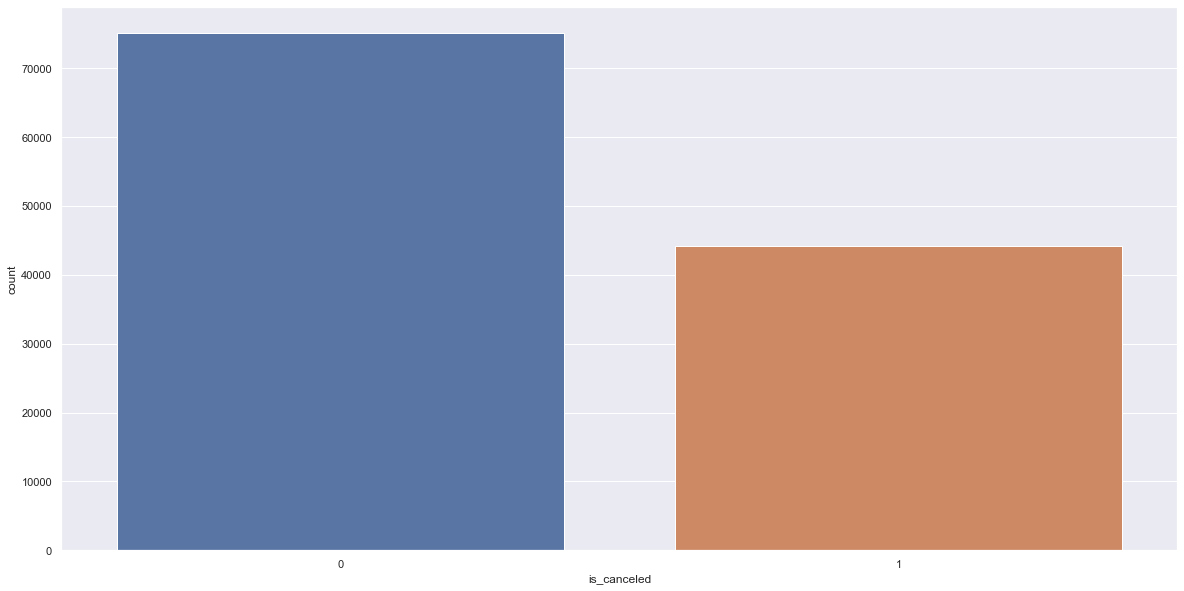

In [17]:
# The label - is_canceled
plt.figure(figsize = (20,10))
sns.countplot(PrepData['is_canceled'])

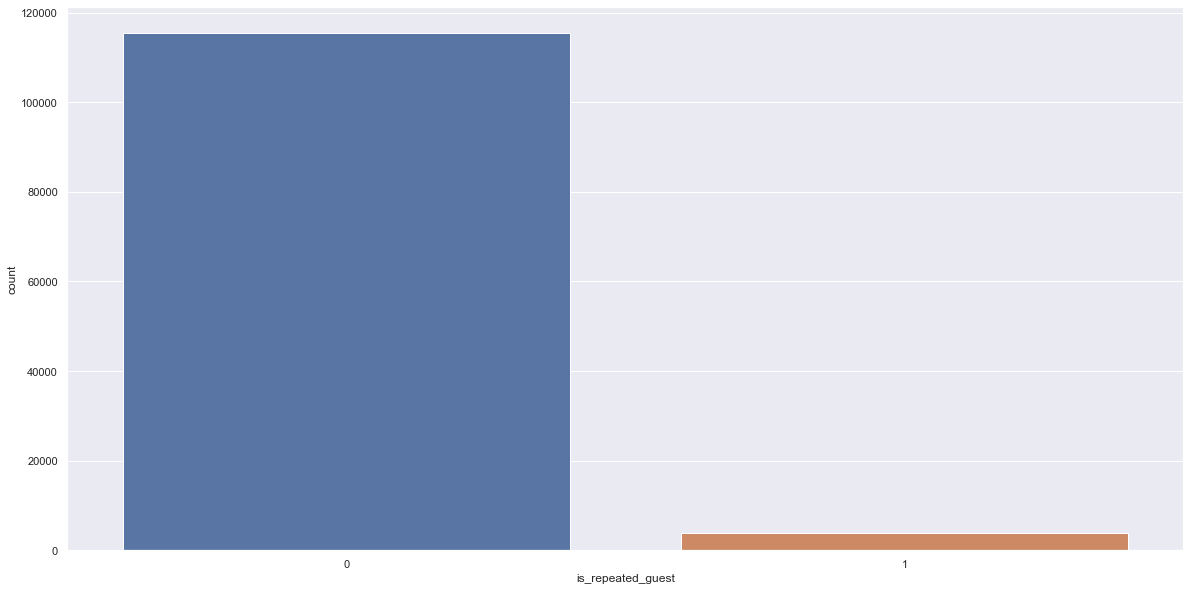

In [18]:
# feature - is_repeated_guest
plt.figure(figsize = (20,10))
sns.countplot(PrepData['is_repeated_guest'])

In [19]:
# feature - is_repeated_guest
PrepData.groupby('is_repeated_guest')['is_canceled'].value_counts()

is_repeated_guest  is_canceled
0                  0              71908
                   1              43672
1                  0               3258
                   1                552
Name: is_canceled, dtype: int64

### For features "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", the graphs generated all have long tails.

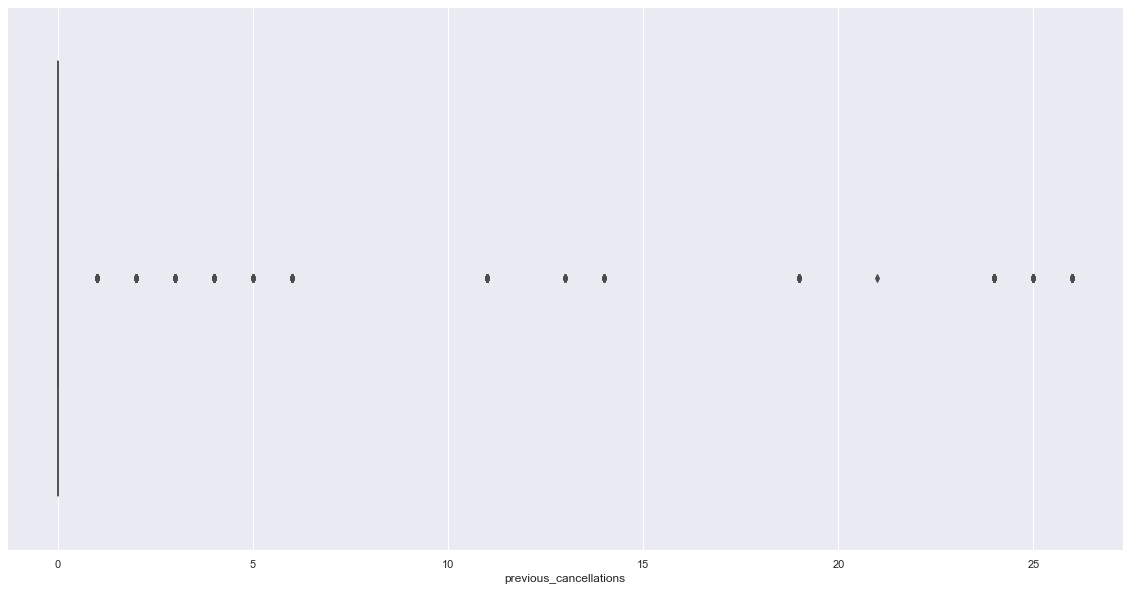

In [20]:
# feature - previous_cancellations: long tail
plt.figure(figsize = (20,10))
sns.boxplot(x=PrepData['previous_cancellations'])

In [21]:
# Binning - Put previous_cancellations into 4 categories
cut_labels_4 = ['0','1-10', '11-20', '21+']
cut_bins = [0, 1, 11, 21, 31]
PrepData['cut_previous_cancellations'] = pd.cut(PrepData['previous_cancellations'], bins=cut_bins, labels=cut_labels_4)
PrepData.groupby('cut_previous_cancellations')['is_canceled'].value_counts()

cut_previous_cancellations  is_canceled
0                           1              5714
                            0               337
1-10                        0               204
                            1                84
11-20                       1                45
                            0                 1
21+                         1                99
Name: is_canceled, dtype: int64

In [22]:
PrepData['cut_previous_cancellations']
# I should have done something wrong in this part, but not sure how to fix it

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
119385    NaN
119386    NaN
119387    NaN
119388    NaN
119389    NaN
Name: cut_previous_cancellations, Length: 119390, dtype: category
Categories (4, object): [0 < 1-10 < 11-20 < 21+]

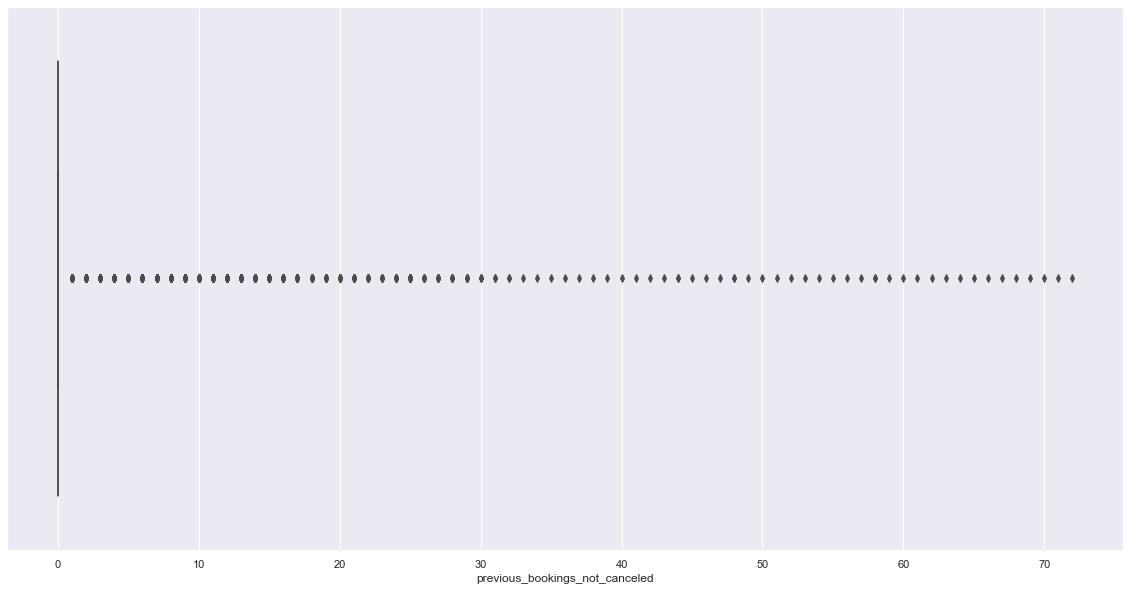

In [23]:
# feature - previous_bookings_not_canceled: long tail
plt.figure(figsize = (20,10))
sns.boxplot(x=PrepData['previous_bookings_not_canceled'])

In [24]:
# Binning - Put previous_bookings_not_canceled into 5 categories
cut_labels_5 = ['0','1-20', '21-40', '41-60', '60+']
cut_bins_previous_bookings_not_canceled = [0, 1, 21, 41, 61, 81]
PrepData['cut_previous_bookings_not_canceled'] = pd.cut(PrepData['previous_bookings_not_canceled'], bins=cut_bins_previous_bookings_not_canceled, labels=cut_labels_5)
PrepData.groupby('cut_previous_bookings_not_canceled')['is_canceled'].value_counts()

cut_previous_bookings_not_canceled  is_canceled
0                                   0              1463
                                    1                79
1-20                                0              1849
                                    1               106
21-40                               0                77
                                    1                12
41-60                               0                20
                                    1                 3
60+                                 0                11
Name: is_canceled, dtype: int64

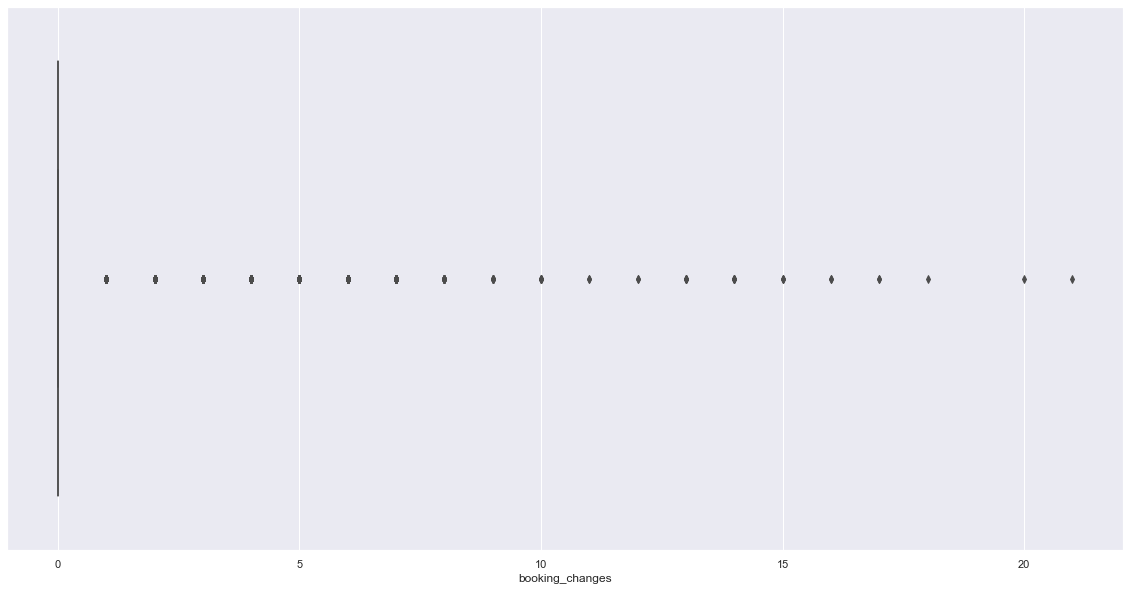

In [25]:
# feature - booking_changes: long tail
plt.figure(figsize = (20,10))
sns.boxplot(PrepData['booking_changes'])

In [ ]:
# Binning - Put booking_changes into 6 categories
cut_labels_6 = ['0','1-5', '6-10', '11-15', '16-20','21+']
cut_bins_booking_changes = [0, 1, 6, 11, 16, 21, 26]
PrepData['cut_booking_changes'] = pd.cut(PrepData['booking_changes'], bins=cut_bins_booking_changes, labels=cut_labels_6)
PrepData.groupby('cut_booking_changes')['is_canceled'].value_counts()
# I should have done something wrong in this part, but not sure how to fix it

In [26]:
# feature - booking_changes
PrepData.groupby('is_canceled')['booking_changes'].value_counts()
# this would be deleted when the code above is debugged

is_canceled  booking_changes
0            0                  59923
             1                  10894
             2                   3039
             3                    783
             4                    309
             5                     98
             6                     45
             7                     28
             8                     13
             9                      7
             10                     5
             13                     5
             14                     4
             15                     3
             11                     2
             12                     2
             17                     2
             16                     1
             18                     1
             20                     1
             21                     1
1            0                  41391
             1                   1807
             2                    766
             3                    144
             4       

In [27]:
# feature - agent
PrepData.groupby('is_canceled')['agent'].value_counts()

is_canceled  agent
0            9.0      18697
             0.0      12310
             240.0     8438
             7.0       3065
             14.0      2988
                      ...  
1            483.0        1
             484.0        1
             526.0        1
             81.0         1
             93.0         1
Name: agent, Length: 533, dtype: int64

In [28]:
# features - deposit_type_No Deposit & deposit_type_Non Refund
PrepData.groupby('deposit_type_No Deposit')['deposit_type_Non Refund'].value_counts()
# 00 = deposit_type_Refundable
# 01 = deposit_type_Non Refund
# 10 = deposit_type_No Deposit

deposit_type_No Deposit  deposit_type_Non Refund
0                        1                           14587
                         0                             162
1                        0                          104641
Name: deposit_type_Non Refund, dtype: int64

In [29]:
# feature - reserved_assigned_room_type_match
PrepData.groupby('reserved_assigned_room_type_match')['is_canceled'].value_counts()

reserved_assigned_room_type_match  is_canceled
0                                  0              14115
                                   1                802
1                                  0              61051
                                   1              43422
Name: is_canceled, dtype: int64

In [30]:
PrepData

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,deposit_type_No Deposit,deposit_type_Non Refund,reserved_assigned_room_type_match,is_canceled,cut_previous_cancellations,cut_previous_bookings_not_canceled
0,0,0,0,C,C,3,0.0,1,0,1,0,NaN,NaN
1,0,0,0,C,C,4,0.0,1,0,1,0,NaN,NaN
2,0,0,0,A,C,0,0.0,1,0,0,0,NaN,NaN
3,0,0,0,A,A,0,304.0,1,0,1,0,NaN,NaN
4,0,0,0,A,A,0,240.0,1,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,A,A,0,394.0,1,0,1,0,NaN,NaN
119386,0,0,0,E,E,0,9.0,1,0,1,0,NaN,NaN
119387,0,0,0,D,D,0,9.0,1,0,1,0,NaN,NaN
119388,0,0,0,A,A,0,89.0,1,0,1,0,NaN,NaN


In [ ]:
#PrepData['agent'].describe()
# agent - country

In [ ]:
#PrepData.to_csv("April9_processeddata.csv")

# Decision Tree & Cross Validation by GridSearchCV

In [ ]:
# Define features and target variable
#features = ['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','deposit_type_No Deposit','deposit_type_Non Refund', 'reserved_assigned_room_type_match']
#target = ['is_canceled']
#X = PrepData [features]
#y = PrepData [target]

In [ ]:
#import functions for data split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [ ]:
# import DecisionTreeClassifier used for tree building
#from sklearn.tree import DecisionTreeClassifier
# import GridSearchCV for cross validation
#from sklearn.model_selection import GridSearchCV